Import functions

FastF1 General Functions: https://docs.fastf1.dev/fastf1.html

In [1]:
import pandas as pd
import numpy as np

import fastf1 as ff1

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import colormaps
from matplotlib.collections import LineCollection
import fastf1.plotting
import seaborn as sns


# Load FastF1's dark color scheme
fastf1.plotting.setup_mpl(mpl_timedelta_support=False, 
                          misc_mpl_mods=False,
                          color_scheme='fastf1')

/Users/noviechiuman/miniconda3/envs/f1_streamlit/lib/python3.13/site-packages/fastf1/plotting/_plotting.py:57: FutureWarning: The `misc_mpl_mods` argument was dropped from `.setup_mpl()` in version 3.6.0 and has no effect anymore. It will be removed in a future version of FastF1.
  warnings.warn(


Enable caching for faster load time (directories have to be created beforehand.)

In [2]:
fastf1.Cache.enable_cache("~/Desktop/fast_f1/Caches/fastf1")

In [3]:
fastf1.get_event_schedule(2025)["Location"].unique()

array(['Sakhir', 'Melbourne', 'Shanghai', 'Suzuka', 'Jeddah', 'Miami',
       'Imola', 'Monaco', 'Barcelona', 'Montréal', 'Spielberg',
       'Silverstone', 'Spa-Francorchamps', 'Budapest', 'Zandvoort',
       'Monza', 'Baku', 'Marina Bay', 'Austin', 'Mexico City',
       'São Paulo', 'Las Vegas', 'Lusail', 'Yas Island'], dtype=object)

Get the race data
- get_session(year, event name, session type)
- Q = Qualifying
- R = Race

.load() and choose whether you want to include telemetry, laps, and/or weather.

In [4]:
session = fastf1.get_session(2025, "Barcelona", "R")
session.load(telemetry=True, laps=True, weather=False)

core           INFO 	Loading data for Spanish Grand Prix - Race [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 19 drivers: ['81', '4', '16', '63', '27', '44', '6', '10', '14', '1', '30', '5', '22', '55', '43', '31', '87', '12', '23']


The .get_driver() function allows you to get the stats of a particular driver by its alias, e.g. LEC for Leclerc (same as race alias).

In [5]:
lec = session.get_driver('LEC')
print(lec)

DriverNumber                                                         16
BroadcastName                                                 C LECLERC
Abbreviation                                                        LEC
DriverId                                                        leclerc
TeamName                                                        Ferrari
TeamColor                                                        ED1131
TeamId                                                          ferrari
FirstName                                                       Charles
LastName                                                        Leclerc
FullName                                                Charles Leclerc
HeadshotUrl           https://media.formula1.com/d_driver_fallback_i...
CountryCode                                                            
Position                                                            3.0
ClassifiedPosition                                              

The laps.pick_fastest() function allows you to pick the fastest lap of that particular race. In this race, the fastest lap belongs to PIA or Piastri.

In [6]:
fastest_lap = session.laps.pick_fastest()
fastest_lap

Time                      0 days 02:25:47.694000
Driver                                       PIA
DriverNumber                                  81
LapTime                   0 days 00:01:15.743000
LapNumber                                   61.0
Stint                                        4.0
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:22.645000
Sector2Time               0 days 00:00:30.476000
Sector3Time               0 days 00:00:22.622000
Sector1SessionTime        0 days 02:24:54.615000
Sector2SessionTime        0 days 02:25:25.091000
Sector3SessionTime        0 days 02:25:47.713000
SpeedI1                                    272.0
SpeedI2                                    287.0
SpeedFL                                    287.0
SpeedST                                    308.0
IsPersonalBest                              True
Compound                                    SOFT
TyreLife            

In [7]:
fastest_lap["Driver"]

'PIA'

# Plot Driver Lap Times Distribution (Violin Plots)

Filter out slow laps (yellow flag, VSC, pitstops etc.) with .pick_quicklaps() as they distort the graph axis.

In [8]:
finish_order = session.drivers
driver_laps = session.laps.pick_drivers(finish_order).pick_quicklaps()
driver_laps = driver_laps.reset_index()

In [9]:
# Seaborn doesn't have proper timedelta support,
# so we have to convert timedelta to float (in seconds)
driver_laps["LapTime(s)"] = driver_laps["LapTime"].dt.total_seconds()

finishing_order = [session.get_driver(i)["Abbreviation"] for i in finish_order]

req            INFO 	Using cached data for driver_info
/Users/noviechiuman/miniconda3/envs/f1_streamlit/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 19.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/noviechiuman/miniconda3/envs/f1_streamlit/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/noviechiuman/miniconda3/envs/f1_streamlit/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/noviechiuman/miniconda3/envs/f1_streamlit/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 10.0% of the points cannot be placed; you may wan

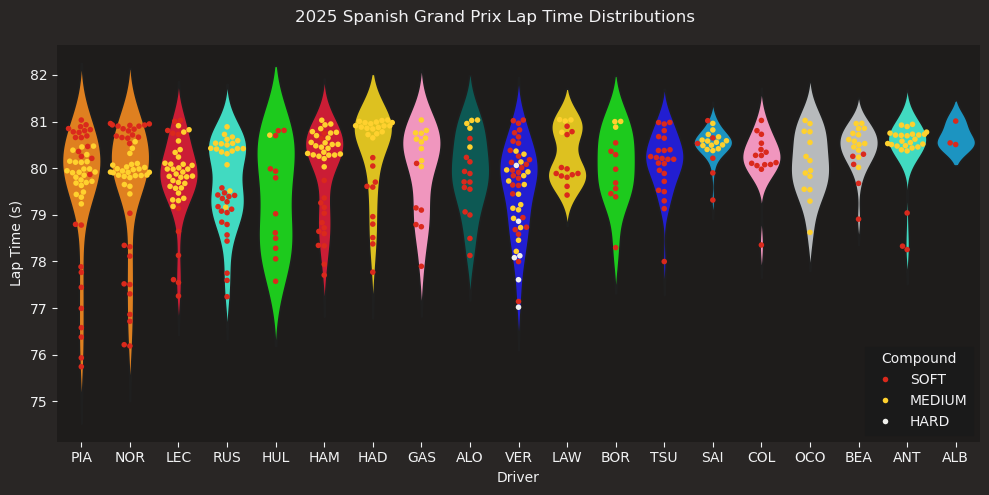

In [10]:
# create the figure
fig, ax = plt.subplots(figsize=(10, 5))

sns.violinplot(data=driver_laps,
               x="Driver",
               y="LapTime(s)",
               hue="Driver",
               inner=None,
               density_norm="area",
               order=finishing_order,
               palette=fastf1.plotting.get_driver_color_mapping(session=session)
               )

sns.swarmplot(data=driver_laps,
              x="Driver",
              y="LapTime(s)",
              hue="Compound",
              order=finishing_order,
              palette=fastf1.plotting.get_compound_mapping(session=session),
              hue_order=["SOFT", "MEDIUM", "HARD"],
              linewidth=0,
              size=4,
              )

ax.set_xlabel("Driver")
ax.set_ylabel("Lap Time (s)")
plt.suptitle("2025 Spanish Grand Prix Lap Time Distributions")
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

# Position Change During Race

For each driver, get their three letter abbreviation (e.g. ‘HAM’) by simply using the value of the first lap, get their color and then plot their position over the number of laps.

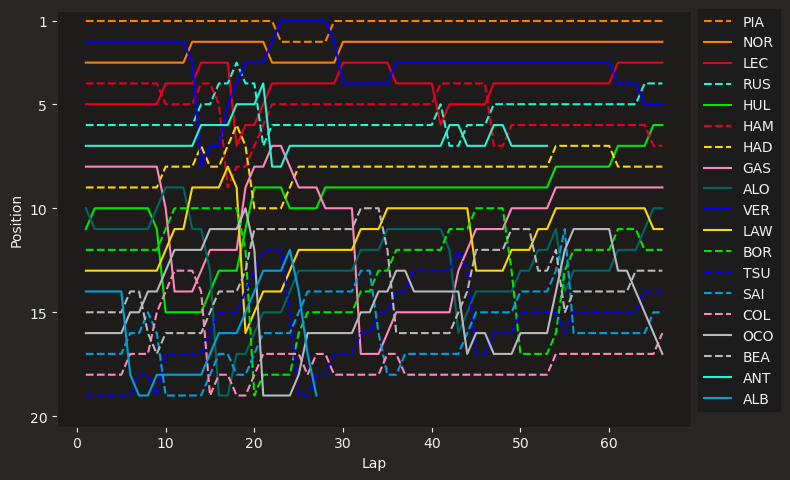

In [11]:
fig, ax = plt.subplots(figsize=(8.0, 4.9))

for drv in session.drivers:
    drv_laps = session.laps.pick_drivers(drv)

    abb = drv_laps['Driver'].iloc[0]
    style = fastf1.plotting.get_driver_style(identifier=abb,
                                             style=['color', 'linestyle'],
                                             session=session)

    ax.plot(drv_laps['LapNumber'], drv_laps['Position'],
            label=abb, **style)

# Finalize the plot by setting y-limits that invert the y-axis so that 
# position one is at the top, set custom tick positions and axis labels.
ax.set_ylim([20.5, 0.5])
ax.set_yticks([1, 5, 10, 15, 20])
ax.set_xlabel('Lap')
ax.set_ylabel('Position')
ax.legend(bbox_to_anchor=(1.0, 1.02))
plt.tight_layout()
plt.show()

# P1 Driver Laptime Scatterplot

In [12]:
p1_driver = session.drivers[:1]
p1_driver

['81']

In [13]:
p1_driver_laps = session.laps.pick_drivers(p1_driver).pick_quicklaps().reset_index()

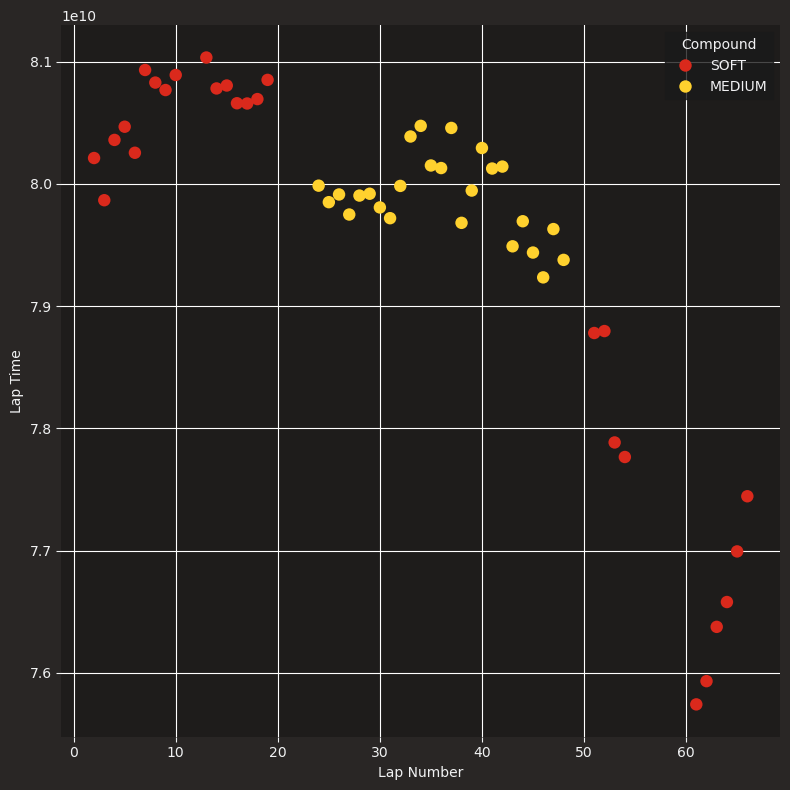

In [14]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(data=p1_driver_laps,
                x="LapNumber",
                y="LapTime",
                ax=ax,
                hue="Compound",
                palette=fastf1.plotting.get_compound_mapping(session=session),
                s=80,
                linewidth=0,
                legend='auto')

ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")
ax.invert_yaxis()

plt.grid(color='w', which='major', axis='both')
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

# Tyre Strategy

In [15]:
stints = session.laps[["Driver", "Stint", "Compound", "LapNumber"]]
stints = stints.groupby(["Driver", "Stint", "Compound"])
stints = stints.count().reset_index()
stints = stints.rename(columns={"LapNumber": "StintLength"})

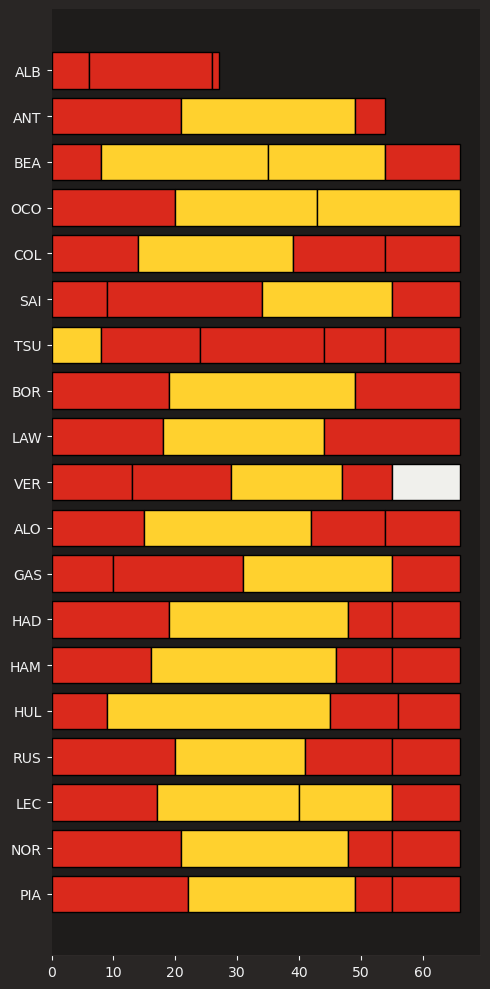

In [16]:
fig, ax = plt.subplots(figsize=(5, 10))

for driver in finishing_order:
    driver_stints = stints.loc[stints["Driver"] == driver]

    previous_stint_end = 0
    for idx, row in driver_stints.iterrows():
        # each row contains the compound name and stint length
        # we can use these information to draw horizontal bars
        compound_color = fastf1.plotting.get_compound_color(row["Compound"],
                                                            session=session)
        plt.barh(
            y=driver,
            width=row["StintLength"],
            left=previous_stint_end,
            color=compound_color,
            edgecolor="black",
            fill=True
        )

        previous_stint_end += row["StintLength"]

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

# Speed visualization of the fastest driver on track map

In [17]:
# Get the fastest lap telemetry for the first driver
p1_driver_laps_telemetry = session.laps.pick_drivers(p1_driver).pick_fastest()

In [18]:
# Get telemetry data
x = p1_driver_laps_telemetry.telemetry['X']              # values for x-axis
y = p1_driver_laps_telemetry.telemetry['Y']              # values for y-axis
color = p1_driver_laps_telemetry.telemetry['Speed']      # value to base color gradient on

Now, we create a set of line segments so that we can color them individually. This creates the points as a N x 1 x 2 array so that we can stack points together easily to get the segments. The segments array for line collection needs to be (numlines) x (points per line) x 2 (for x and y).

In [19]:
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

In [20]:
points

array([[[1376.33561411, -250.01874958]],

       [[1352.78305919, -286.02957553]],

       [[1270.        , -416.        ]],

       ...,

       [[1456.69004037, -124.74796079]],

       [[1399.        , -215.        ]],

       [[1397.94059705, -216.65295666]]], shape=(583, 1, 2))

In [21]:
segments

array([[[1376.33561411, -250.01874958],
        [1352.78305919, -286.02957553]],

       [[1352.78305919, -286.02957553],
        [1270.        , -416.        ]],

       [[1270.        , -416.        ],
        [1255.07019427, -439.742578  ]],

       ...,

       [[1529.        ,  -12.        ],
        [1456.69004037, -124.74796079]],

       [[1456.69004037, -124.74796079],
        [1399.        , -215.        ]],

       [[1399.        , -215.        ],
        [1397.94059705, -216.65295666]]], shape=(582, 2, 2))

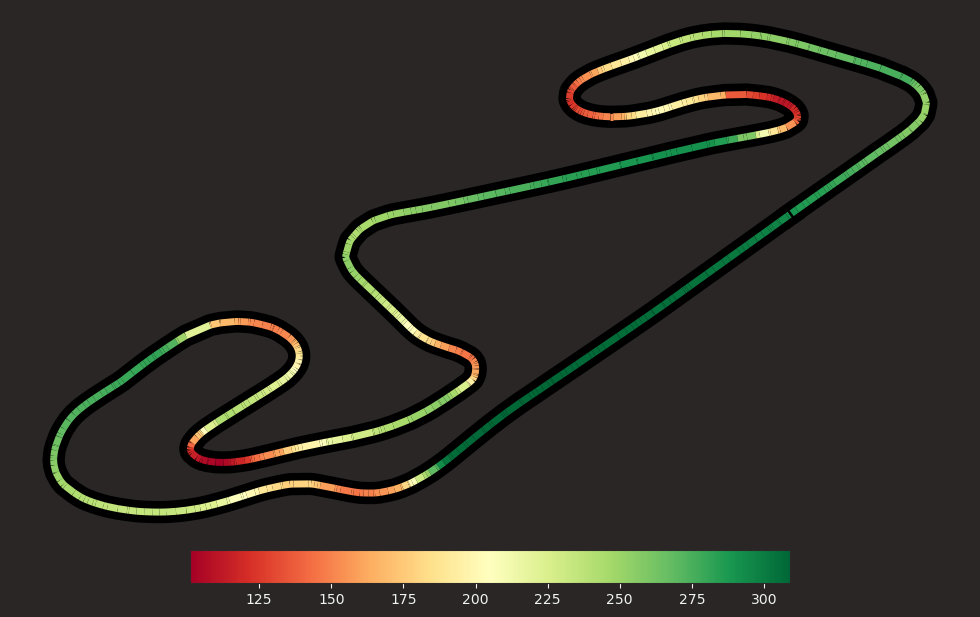

In [22]:
colormap = mpl.cm.RdYlGn

# We create a plot with title and adjust some setting to make it look good.
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')


# After this, we plot the data itself.
# Create background track line
ax.plot(p1_driver_laps_telemetry.telemetry['X'], 
        p1_driver_laps_telemetry.telemetry['Y'],
        color='black', 
        linestyle='-', 
        linewidth=16, 
        zorder=0)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=colormap, norm=norm,
                    linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(color)

# Merge all line segments together
line = ax.add_collection(lc)


# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap,
                                   orientation="horizontal")


# Show the plot
plt.show()

In [23]:
def rotate(xy, *, angle):
    rot_mat = np.array([[np.cos(angle), np.sin(angle)],
                        [-np.sin(angle), np.cos(angle)]])
    return np.matmul(xy, rot_mat)

In [24]:
circuit_info = session.get_circuit_info()
track = segments

# Convert the rotation angle from degrees to radian.
track_angle = circuit_info.rotation / 180 * np.pi

# Rotate and plot the track map.
rotated_track = rotate(track, angle=track_angle)

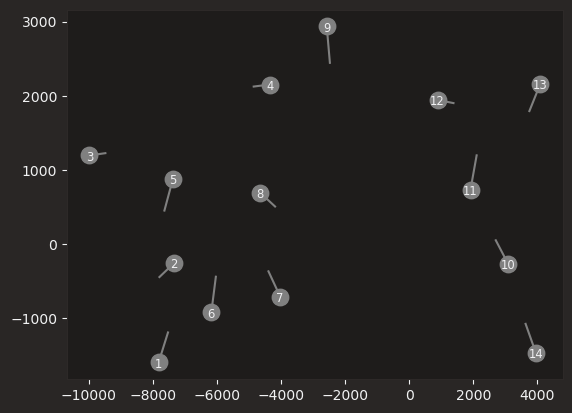

In [25]:
offset_vector = [500, 0]

# Iterate over all corners.
for _, corner in circuit_info.corners.iterrows():
    # Create a string from corner number and letter
    txt = f"{corner['Number']}{corner['Letter']}"

    # Convert the angle from degrees to radian.
    offset_angle = corner['Angle'] / 180 * np.pi

    # Rotate the offset vector so that it points sideways from the track.
    offset_x, offset_y = rotate(offset_vector, angle=offset_angle)

    # Add the offset to the position of the corner
    text_x = corner['X'] + offset_x
    text_y = corner['Y'] + offset_y

    # Rotate the text position equivalently to the rest of the track map
    text_x, text_y = rotate([text_x, text_y], angle=track_angle)

    # Rotate the center of the corner equivalently to the rest of the track map
    track_x, track_y = rotate([corner['X'], corner['Y']], angle=track_angle)

    # Draw a circle next to the track.
    plt.scatter(text_x, text_y, color='grey', s=140)

    # Draw a line from the track to this circle.
    plt.plot([track_x, text_x], [track_y, text_y], color='grey')

    # Finally, print the corner number inside the circle.
    plt.text(text_x, text_y, txt,
             va='center_baseline', ha='center', size='small')

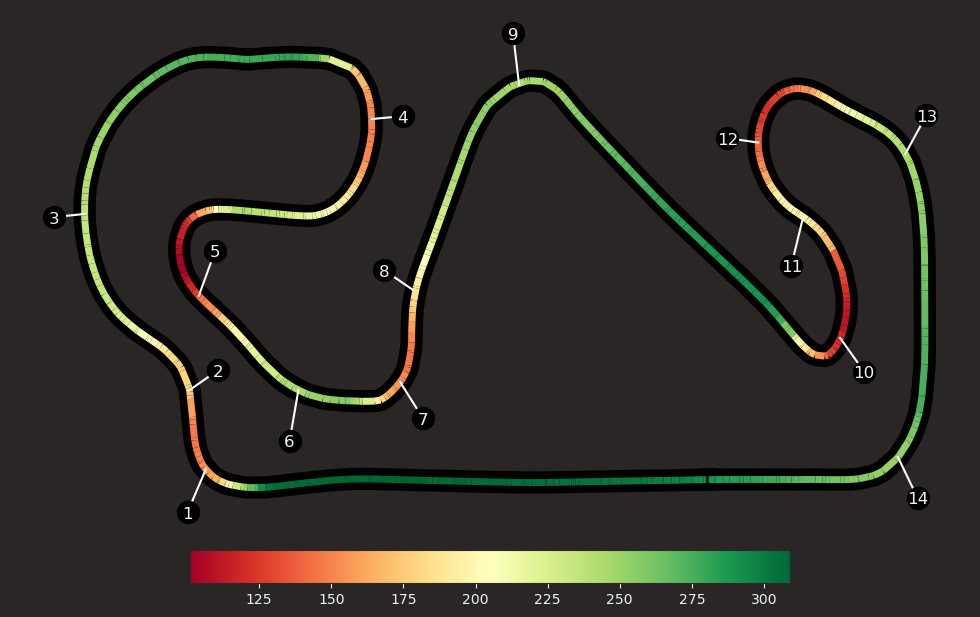

In [26]:
def rotate(xy, *, angle):
    rot_mat = np.array([[np.cos(angle), np.sin(angle)],
                        [-np.sin(angle), np.cos(angle)]])
    return np.matmul(xy, rot_mat)

# Get telemetry data
x = p1_driver_laps_telemetry.telemetry['X']              # values for x-axis
y = p1_driver_laps_telemetry.telemetry['Y']              # values for y-axis
color = p1_driver_laps_telemetry.telemetry['Speed']      # value to base color gradient on

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

colormap = mpl.cm.RdYlGn

# Get circuit info for corners
circuit_info = session.get_circuit_info()

# Convert the rotation angle from degrees to radian.
track_angle = circuit_info.rotation / 180 * np.pi

# Rotate the track segments
rotated_segments = rotate(segments.reshape(-1, 2), angle=track_angle).reshape(-1, 2, 2)

# We create a plot with title and adjust some setting to make it look good.
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

# Create background track line (rotated)
rotated_xy = rotate(np.array([x, y]).T, angle=track_angle)
ax.plot(rotated_xy[:, 0], rotated_xy[:, 1], 
        color='black', linestyle='-', linewidth=16, zorder=0)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(rotated_segments, cmap=colormap, norm=norm,
                    linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(color)

# Merge all line segments together
line = ax.add_collection(lc)

# Add corner annotations
offset_vector = [500, 0]

# Iterate over all corners.
for _, corner in circuit_info.corners.iterrows():
    # Create a string from corner number and letter
    txt = f"{corner['Number']}{corner['Letter']}"

    # Convert the angle from degrees to radian.
    offset_angle = corner['Angle'] / 180 * np.pi

    # Rotate the offset vector so that it points sideways from the track.
    offset_x, offset_y = rotate(offset_vector, angle=offset_angle)

    # Add the offset to the position of the corner
    text_x = corner['X'] + offset_x
    text_y = corner['Y'] + offset_y

    # Rotate the text position equivalently to the rest of the track map
    text_x, text_y = rotate([text_x, text_y], angle=track_angle)

    # Rotate the center of the corner equivalently to the rest of the track map
    track_x, track_y = rotate([corner['X'], corner['Y']], angle=track_angle)

    # Draw a circle next to the track.
    ax.scatter(text_x, text_y, color='black', s=250, zorder=10)

    # Draw a line from the track to this circle.
    ax.plot([track_x, text_x], [track_y, text_y], color='white', zorder=9)

    # Finally, print the corner number inside the circle.
    ax.text(text_x, text_y, txt,
            va='center_baseline', ha='center', size='large', zorder=11)

# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap,
                                   orientation="horizontal")

# Show the plot
plt.show()

# Plot speed traces with corner annotations

In [27]:
car_data = p1_driver_laps_telemetry.get_car_data().add_distance()

# Load the circuit info that includes the information about the location of the corners.
circuit_info = session.get_circuit_info()

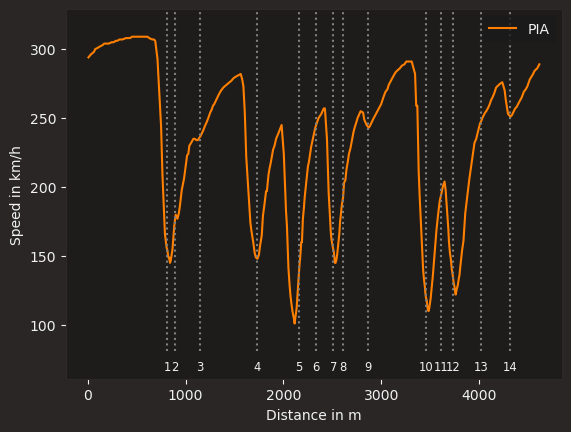

In [28]:
team_color = fastf1.plotting.get_team_color(fastest_lap['Team'],
                                            session=session)

fig, ax = plt.subplots()
ax.plot(car_data['Distance'], car_data['Speed'],
        color=team_color, label=fastest_lap['Driver'])

# Draw vertical dotted lines at each corner that range from slightly below the
# minimum speed to slightly above the maximum speed.
v_min = car_data['Speed'].min()
v_max = car_data['Speed'].max()
ax.vlines(x=circuit_info.corners['Distance'], ymin=v_min-20, ymax=v_max+20,
          linestyles='dotted', colors='grey')

# Plot the corner number just below each vertical line.
# For corners that are very close together, the text may overlap. A more
# complicated approach would be necessary to reliably prevent this.
for _, corner in circuit_info.corners.iterrows():
    txt = f"{corner['Number']}{corner['Letter']}"
    ax.text(corner['Distance'], v_min-30, txt,
            va='center_baseline', ha='center', size='small')

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')
ax.legend()

# Manually adjust the y-axis limits to include the corner numbers, because
# Matplotlib does not automatically account for text that was manually added.
ax.set_ylim([v_min - 40, v_max + 20])

plt.show()

Let's plot Piastri vs Verstappen

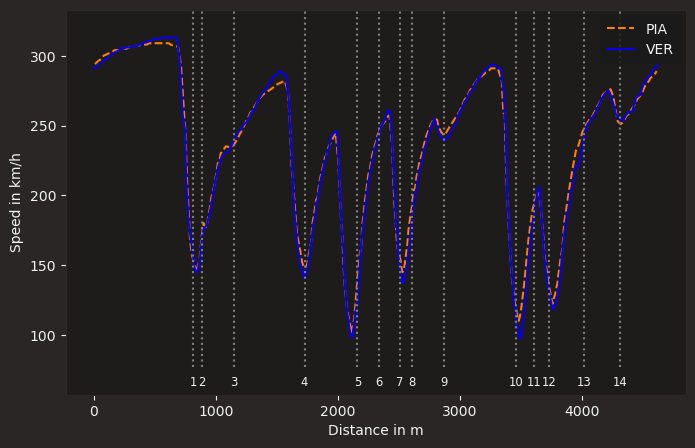

In [29]:
circuit_info = session.get_circuit_info()

fig, ax = plt.subplots(figsize=(8, 5))

for driver in ('PIA', 'VER'):
    telemetry = session.laps.pick_drivers(driver).pick_fastest()
    car_data = telemetry.get_car_data().add_distance()

    style = fastf1.plotting.get_driver_style(identifier=driver,
                                             style=['color', 'linestyle'],
                                             session=session)
    
    ax.plot(car_data['Distance'], 
            car_data['Speed'],
            **style, 
            label=driver)

# Draw vertical dotted lines at each corner that range from slightly below the
# minimum speed to slightly above the maximum speed.
v_min = car_data['Speed'].min()
v_max = car_data['Speed'].max()
ax.vlines(x=circuit_info.corners['Distance'], 
            ymin=v_min-20, 
            ymax=v_max+20,
            linestyles='dotted', 
            colors='grey')

# Plot the corner number just below each vertical line.
# For corners that are very close together, the text may overlap. A more
# complicated approach would be necessary to reliably prevent this.
for _, corner in circuit_info.corners.iterrows():
    txt = f"{corner['Number']}{corner['Letter']}"
    ax.text(corner['Distance'], 
            v_min-30, txt,
            va='center_baseline', 
            ha='center', 
            size='small')

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')
ax.legend()

# Manually adjust the y-axis limits to include the corner numbers, because
# Matplotlib does not automatically account for text that was manually added.
ax.set_ylim([v_min - 40, v_max + 20])
    
plt.show()
    